MovieWriter ffmpeg unavailable; using Pillow instead.


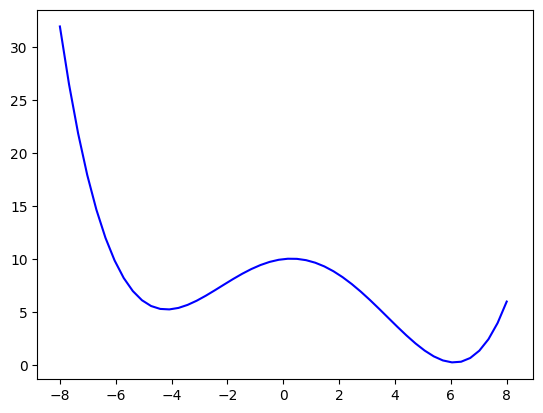

In [1]:
from typing import Callable
import numpy as np
from matplotlib.animation import ArtistAnimation
import matplotlib.pyplot as plt
from sympy import lambdify, symbols


class Optimize:
    """
    A gradient descent optimization class with momentum for univariate functions.

    This class uses the concept of momentum to smooth out the updates and potentially
    accelerate the convergence in the context of optimization.

    Attributes:
        x (float): The current value of the variable being optimized.
        lr (float): The learning rate, controlling the step size in gradient descent.
        f (Callable): The univariate function to be optimized.
        v (float): The momentum term, initialized to 0, which accumulates the gradient information.
        beta (float): The momentum coefficient, dictating how much of the past gradient is retained.

    Methods:
        df(delta=1e-4): Computes an approximation of the derivative of the function at 'x'.
        __iter__(): Returns the iterator object (required for making the class iterable).
        __next__(): Executes one step of gradient descent with momentum and updates 'x'.
    """

    def __init__(self, x: float, lr: float, f: Callable) -> None:
        """
        Initializes the Optimize object with a starting point, learning rate, function, and momentum parameters.

        Parameters:
            x (float): The initial value of the variable to be optimized.
            lr (float): The learning rate for the gradient descent.
            f (Callable): The univariate function to be optimized.
        """
        self.x = x
        self.lr = lr
        self.f = f
        self.v = 0
        self.beta = 0.99

    def df(self, delta=1e-4) -> float:
        """
        Approximates the derivative of the function at the current point using the central difference method.

        Parameters:
            delta (float, optional): A small change in 'x' for calculating the derivative. Default is 1e-4.

        Returns:
            float: The approximated derivative at the current value of 'x'.
        """
        return (self.f(self.x + delta) - self.f(self.x - delta)) / (2 * delta)

    def __iter__(self):
        """
        Returns the iterator object.

        Required for making the class instances iterable with a for loop.

        Returns:
            Optimize: The iterator object itself.
        """
        return self

    def __next__(self) -> float:
        """
        Executes one step of the gradient descent with momentum.

        This method updates the value of 'x' based on the current gradient and momentum. It also updates the momentum term.

        Returns:
            float: The updated value of 'x' after a step of gradient descent with momentum.
        """
        self.x -= self.lr * self.v
        self.v = self.beta * self.v + (1 - self.beta) * self.df()
        self.beta *= 1 - 1e-5
        return self.x


if __name__ == "__main__":
    # Instantiate the Optimize class
    x = symbols("x")
    f = lambdify(x, 0.01 * x**4 - 0.03 * x**3 - 0.5 * x**2 + 0.3 * x + 10, "numpy")
    optimize = Optimize(-8, 0.1, f)

    # Plot the function curve
    line_x = np.linspace(-8, 8)
    line_y = f(line_x)
    fig = plt.figure()
    arts = []
    plt.plot(line_x, line_y, "b")

    # Set the stopping condition
    pre_y = np.inf
    n_stop = 500

    # Execute the gradient descent
    for i, x in enumerate(optimize):
        # Plot the animation
        text = plt.text(
            0, 20, f"epoch: {i}, value: {f(x):.5f}", fontsize=10, color="blue"
        )
        frame = plt.plot(x, f(x), "ro")
        frame.append(text)
        arts.append(frame)

        # Check if the stopping condition is met
        if i > n_stop or abs(pre_y - f(x)) < 1e-5:
            break
        pre_y = f(x)

    # Generate and save the animation
    ani = ArtistAnimation(fig, arts, interval=200)
    ani.save("movie.gif")